<a href="https://colab.research.google.com/github/InutilemMachina/DS_posts/blob/main/HARI_L_Hypotheses_V20230901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision matrix by hypothesis testing**

*Author: László Hári*


---

`version: 2023.09.01`

*About the notebook.*

**Goal**: introduce confusion matrix on the example of statistical hypothesis test.

**Theory**: statistical hypotheses tests have a significance limit and a power. However the test can lead erroneous conclusions. These types of decisions are introduced.

**Course**:
- Establish a hypothesis testing problem.
    - a) Derice sample size in spite of power.
    - b) Derive power in spite of sample size. (Effect size will be guessed.)
- Visualization of competing hypotheses.
- Introduction of the decision matrix with its elements.
- Calculation of possible conclusions form a hypothesis test.




*preamble*

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4,3)

def plotlabels(ax,title,xlabel,ylabel):
    # use plt.gca() if plotted by plt.plot...
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    # ax.autoscale(enable=True, axis='both', tight=True)

# 1. A problem to test

Suppose you have a hypothesis that the average height of males is different from the average height of females. I know, not so imaginative problem. We will immediately form our hypothesis pair:

$$
H_0: \mathrm{average\ male\ height = average\ female\ height} \\
H_A: \mathrm{average\ male\ height \neq average\ female\ height}
$$

or simply put

$$
H_0: \overline{x}_m = \overline{x}_f \\
H_A: \overline{x}_m \neq \overline{x}_f
$$

We already know, this will be a two-sided test. We also need a test, for which the test of the means will be just superb.

# 2. Visualization

In [2]:
import scipy.stats as stats

# Create normal distribution objects
dist1 = stats.norm(170,2)
dist2 = stats.norm(180,5)

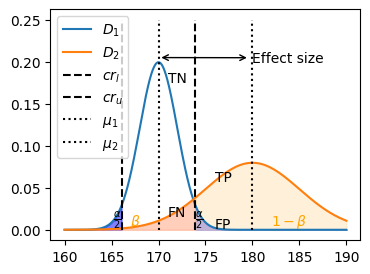

In [3]:
import numpy as np

x = np.linspace(160, 190, num=1000)  # sample space
plt.plot(x, dist1.pdf(x), label='$D_1$')  # pdf 1
plt.plot(x, dist2.pdf(x), label='$D_2$')  # pdf 2

# find the two sided critical value for a 0.05 significance level in pdf 1:
sig = 0.05
crit_l = dist1.ppf(sig/2)
crit_u = dist1.ppf(1-sig/2)

# plot boundaries at critical values
plt.plot([crit_l, crit_l], [0, 0.25], 'k--', label = '$cr_l$')
plt.plot([crit_u, crit_u], [0, 0.25], 'k--', label = '$cr_u$')

# fill rejection regions
x_fill1 = x[ x<=crit_l ]
plt.fill_between(x_fill1, dist1.pdf(x_fill1), color='blue', alpha=0.5)
x_fill2 = x[ x>=crit_u ]
plt.fill_between(x_fill2, dist1.pdf(x_fill2), color='blue', alpha=0.5)

# annotate rejection regions
plt.text(crit_l,0, r'$\frac{\alpha}{2}$', ha = 'right', va = 'bottom')
plt.text(crit_u,0, r'$\frac{\alpha}{2}$', ha = 'left', va = 'bottom')


x_fill3 = x[ x<=crit_u ]
plt.fill_between(x_fill3, dist2.pdf(x_fill3), color='#FFA07A', alpha=0.5) # fill \beta
plt.text(np.mean(x_fill3),0, r'$\beta$', ha = 'left', va = 'bottom', color = 'orange') # annotate \beta

x_fill4 = x[ x>=crit_u ]
plt.fill_between(x_fill4, dist2.pdf(x_fill4), color='#FFE4B5', alpha=0.5) # fill power
plt.text(np.mean(x_fill4),0, r'$1- \beta$', ha = 'left', va = 'bottom', color = 'orange') # annotate power

# plot mean values
# plt.plot([dist1.mean(), dist1.mean()], [0, dist1.pdf(dist1.mean())], 'k:', label = '$\mu_1$')
# plt.plot([dist2.mean(), dist2.mean()], [0, dist2.pdf(dist2.mean())], 'k:', label = '$\mu_2$')

# plot dashed lines at mean values
plt.plot([dist1.mean(), dist1.mean()], [0, 0.25], 'k:', label = '$\mu_1$')
plt.plot([dist2.mean(), dist2.mean()], [0, 0.25], 'k:', label = '$\mu_2$')

# plot effect size
effect = dist2.mean() - dist1.mean()
plt.annotate('Effect size', xy=(dist1.mean(), 0.205), xytext=(dist2.mean(), 0.2), arrowprops=dict(arrowstyle='<->', lw=1)) # two-sided arrow between the two vertical lines

# add texts.
plt.annotate('TN', xy=(171,dist1.pdf(171)))
plt.annotate('FN', xy=(171,dist2.pdf(171)))
plt.annotate('TP', xy=(176,dist2.pdf(176)))
plt.annotate('FP', xy=(176,dist1.pdf(176)))

plt.legend(loc = 'upper left')

## 2.1 Draw samples

(array([0.01264053, 0.01685404, 0.06320266, 0.07584319, 0.08427021,
        0.02949457, 0.07584319, 0.02949457, 0.02528106, 0.00842702]),
 array([167.87965276, 170.25297077, 172.62628877, 174.99960678,
        177.37292478, 179.74624278, 182.11956079, 184.49287879,
        186.8661968 , 189.2395148 , 191.61283281]),
 <BarContainer object of 10 artists>)

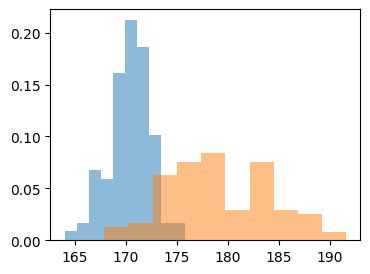

In [4]:
# Generate 100 random numbers from dist1, and dist2
n = 100
xm = dist1.rvs(size=n)
xf = dist2.rvs(size=n)

plt.hist(xm, density = True, alpha = 0.5)
plt.hist(xf, density = True, alpha = 0.5)

# 3. Two sample $t$-test

In [5]:
#find variance for each group
print(np.var(xm), np.var(xf))

4.187233475310714 23.960222546955205


In [6]:
# perform two sample t-test with equal variances
stats.ttest_ind(a=xm, b=xf, equal_var=False)

Ttest_indResult(statistic=-16.641230950444257, pvalue=2.8552828151196243e-34)

Since the $p$-value is smaller than the $\alpha$ significance limit, we reject $H_0$.

# 4. Decision matrix
We collect the probabilities and the decisions from the first figure and summarize them in a matrix.

In [7]:
# A confusion matrix in general:
import pandas as pd

df = pd.DataFrame({'Decide H0': ['True Negative', 'False Negative'],
                   'Decide HA': ['False Positive', 'True Positive']},
                  index=['H0 real', 'HA real'])
df

,Decide H0,Decide HA
H0 real,True Negative,False Positive
HA real,False Negative,True Positive


We usually set a significance limit, $\alpha$ ; we "*aim/hope/wish/imagine*" an effect size, and power is set at least to 80%. Note, don't be surprised, if you hope for a large effect size, e.g. 10 in current case, the solver might not converge. In that case you can make sure, that the chosen sample size yields a power necessary to you.

In [8]:
from statsmodels.stats.power import tt_ind_solve_power

alpha = 0.05
effect_size = 1.0  # estimated or guessed or hypothesized or wished for
power = 0.8  # set
beta = 1 - power

sample_size = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power)
sample_size

16.71472257227619

we note, that $\beta$ can be caluclated given a sample size. We see, that one-hundred samples will ensure the 80% power.

In [9]:
    # Calc beta:
    sample_size_given = 100
    effect_size = 10.0  # estimated or guessed or hypothesized or wished for
    power_calc = tt_ind_solve_power(effect_size=effect_size, nobs1=sample_size_given, alpha=alpha)
    power_calc

1.0

In [11]:
# probabilities:
FP = alpha
FN = beta
TN = 1-alpha
TP = 1-beta

In [12]:
# A decision matrix in general:
import pandas as pd

df = pd.DataFrame({'Decision 1': ['TN:' + str(TN), 'FN:' + str(round(FN,3))],
                   'Decision 2': ['FP:' + str(FP), 'TP:' + str(round(TP,3))]},
                  index=['Condition 1', 'Condition 2'])
print('probabilities')
df

probabilities


,Decision 1,Decision 2
Condition 1,TN:0.95,FP:0.05
Condition 2,FN:0.2,TP:0.8


In [13]:
# expected counts:
n = sample_size_given
fp = FP*n
fn = FN*n
tn = TN*n
tp = TP*n

In [14]:
# A decision matrix in general:
import pandas as pd

df = pd.DataFrame({'Decision 1': ['tn:' + str(tn), 'fn:' + str(round(fn,3))],
                   'Decision 2': ['fp:' + str(fp), 'tp:' + str(round(tp,3))]},
                  index=['Condition 1', 'Condition 2'])
print('expected counts')
df

expected counts


,Decision 1,Decision 2
Condition 1,tn:95.0,fp:5.0
Condition 2,fn:20.0,tp:80.0


Credits, Sources, Further readings:


https://www.statology.org/two-sample-t-test/

---


```
version history:
@ 2023.09.01 - establishment
```

